This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [1]:
#Подключаем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Загружаем датасет
from google.colab import files
files.upload()

Saving vgsales.csv to vgsales.csv


{'vgsales.csv': b'Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales\n1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74\n2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24\n3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82\n4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33\n5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37\n6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26\n7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01\n8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02\n9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62\n10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31\n11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11,1.93,2.75,24.76\n12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42\n13,Pokemon Gold/Pokemon Silver,GB,1999,Ro

In [0]:
#Парсим датасет
data = pd.read_csv('vgsales.csv', sep=",")

Основные характеристики датасета:

In [5]:
# Первые 5 строк датасета
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Определим размер датсета
data.shape

(16598, 11)

In [7]:
# Список колонок с типами данных
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Rank - 0
Name - 0
Platform - 0
Year - 271
Genre - 0
Publisher - 58
NA_Sales - 0
EU_Sales - 0
JP_Sales - 0
Other_Sales - 0
Global_Sales - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Визуальное исследование датасета

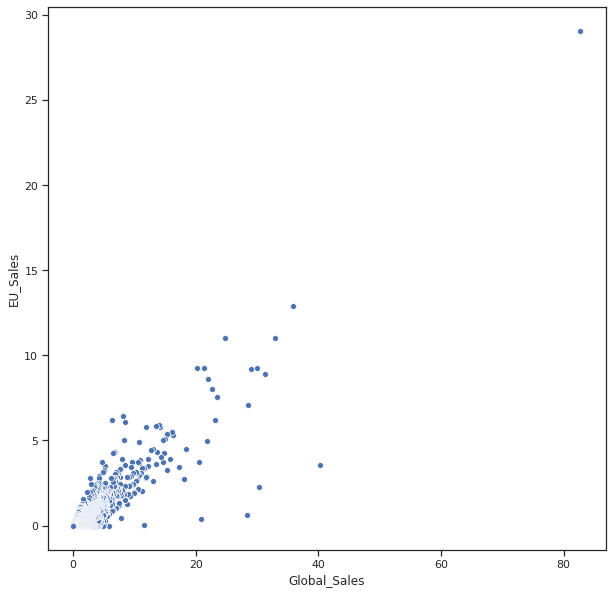

In [12]:
#Диаграмма расссеяния для глобальных продаж и продаж EU
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Global_Sales', y='EU_Sales', data=data)

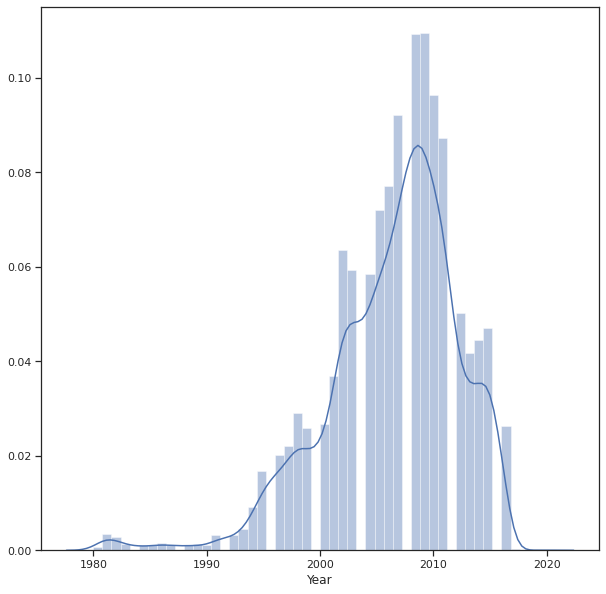

In [13]:
#Гистограмма по годам
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Year'])

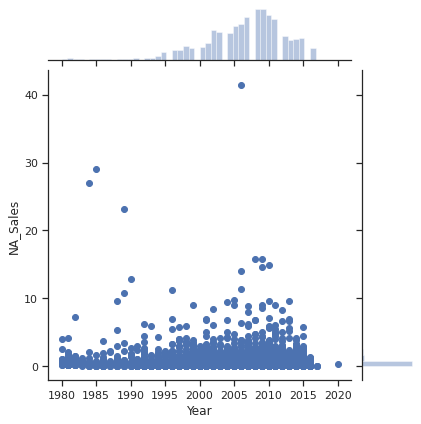

In [17]:
#Jointplot
#Комбинация гистограмм и диаграмм рассеивания. Для года и NA продаж
sns.jointplot(x='Year', y='NA_Sales', data=data)

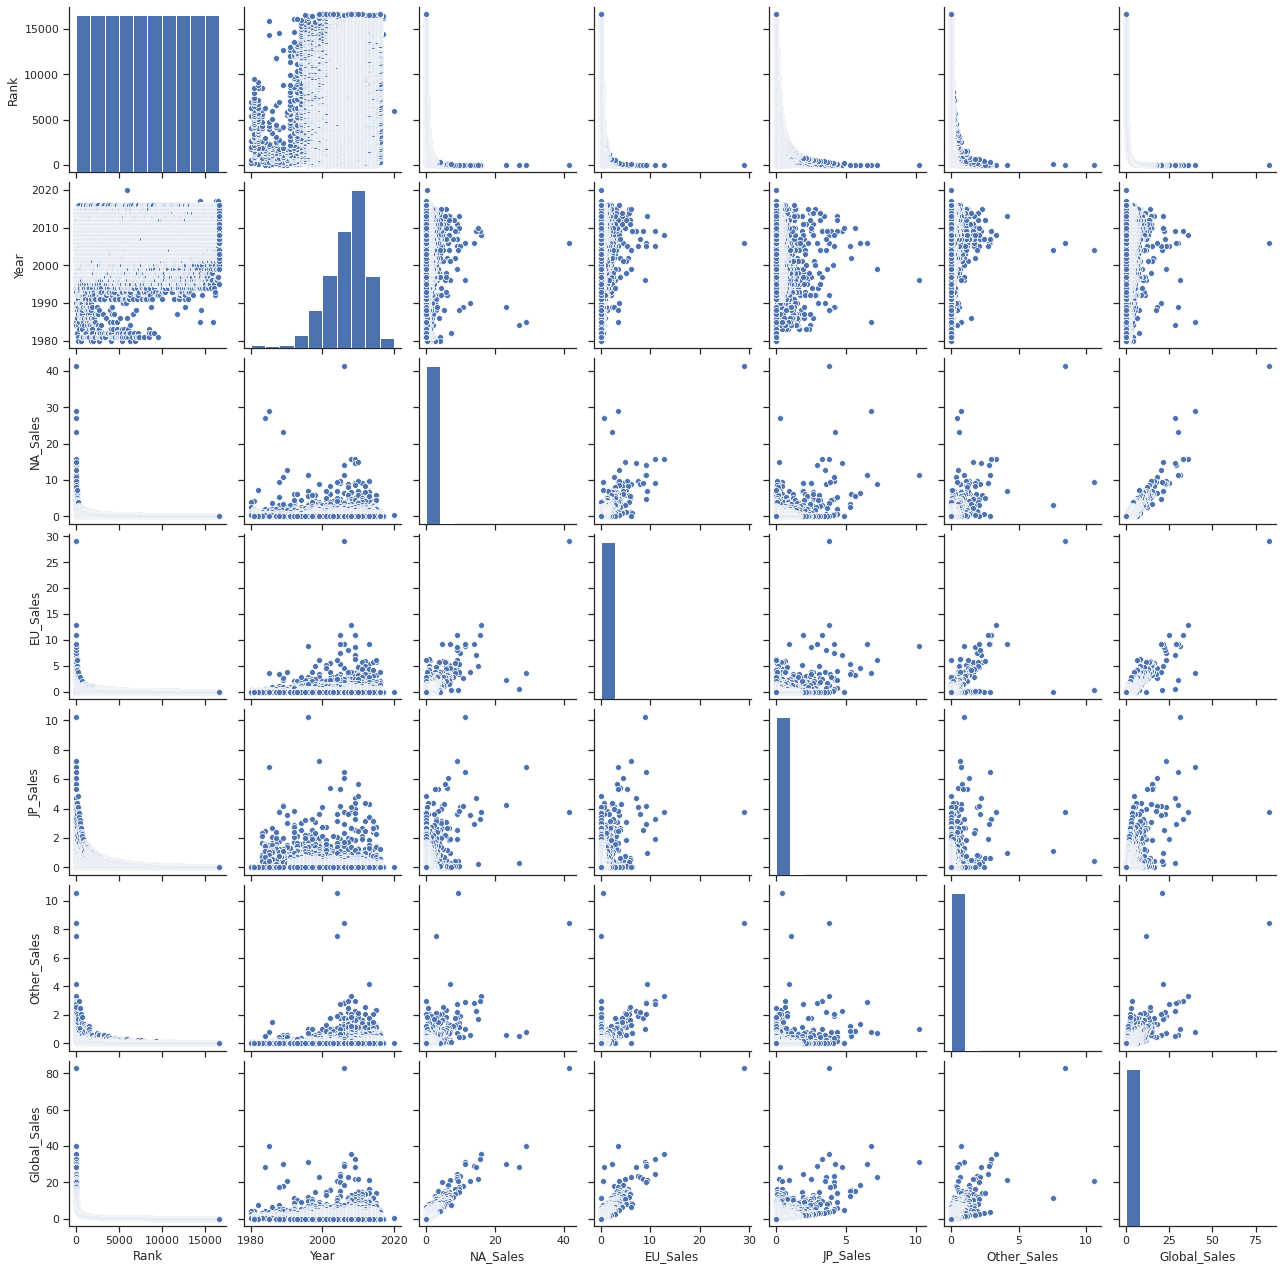

In [18]:
#Парные диаграммы для всего датасета
sns.pairplot(data)

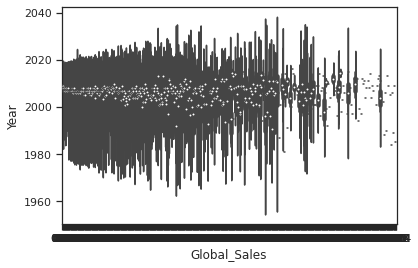

In [20]:
# Распределение параметра All_sales сгруппированные по Year.
sns.violinplot(x='Global_Sales', y='Year', data=data)

Информация о корреляции признаков

In [21]:
#Корреляционная матрица
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


Построим корреляционные матрицы на основе различных методов

In [22]:
data.corr(method='pearson')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [23]:
data.corr(method='kendall')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.104901,-0.669392,-0.556641,-0.125372,-0.677420,-0.989750
Year,0.104901,1.000000,-0.094939,-0.047794,0.013893,0.041790,-0.105730
NA_Sales,-0.669392,-0.094939,1.000000,0.556031,-0.181112,0.640092,0.675652
EU_Sales,-0.556641,-0.047794,0.556031,1.000000,-0.143193,0.661482,0.561736
JP_Sales,-0.125372,0.013893,-0.181112,-0.143193,1.000000,-0.058865,0.126682
Other_Sales,-0.677420,0.041790,0.640092,0.661482,-0.058865,1.000000,0.684007
Global_Sales,-0.989750,-0.105730,0.675652,0.561736,0.126682,0.684007,1.000000


In [24]:
data.corr(method='spearman')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.151529,-0.795516,-0.697105,-0.151851,-0.810416,-0.999622
Year,0.151529,1.000000,-0.133088,-0.057729,0.009605,0.055726,-0.151248
NA_Sales,-0.795516,-0.133088,1.000000,0.681254,-0.228603,0.769432,0.795572
EU_Sales,-0.697105,-0.057729,0.681254,1.000000,-0.177486,0.766054,0.696846
JP_Sales,-0.151851,0.009605,-0.228603,-0.177486,1.000000,-0.069990,0.151931
Other_Sales,-0.810416,0.055726,0.769432,0.766054,-0.069990,1.000000,0.810381
Global_Sales,-0.999622,-0.151248,0.795572,0.696846,0.151931,0.810381,1.000000


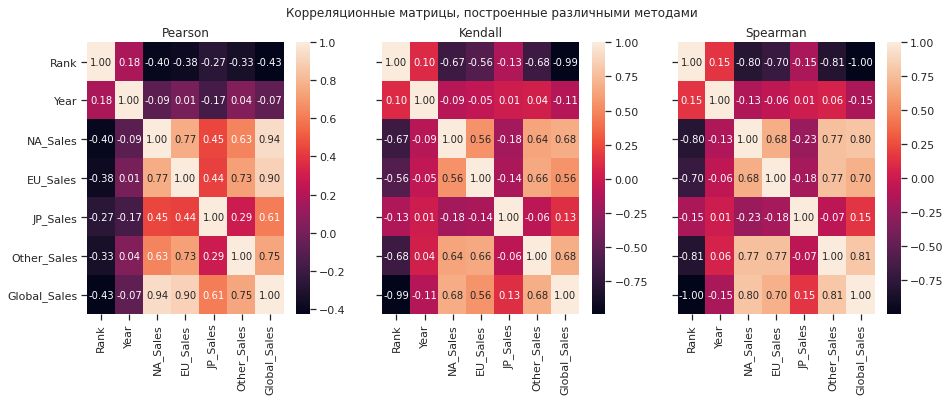

In [26]:
# Используем метод heatmap для различных методов
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')